#### Using master branch on AllenSDK and feature/update_response_analysis branch on VBA (current as of 4/29/20)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from visual_behavior import database as db
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession
import seaborn as sns

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_api/behavior_ophys_nwb_api.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [181]:
%load_ext autoreload
%autoreload 2
%widescreen

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def load_flashwise_summary(behavior_session_id=None):
    conn = db.Database('visual_behavior_data')
    collection = conn['behavior_analysis']['annotated_stimulus_presentations']

    if behavior_session_id is None:
        # load all
        df = pd.DataFrame(list(collection.find({})))
    else:
        # load data from one behavior session
        df = pd.DataFrame(list(collection.find({'behavior_session_id':behavior_session_id})))

    conn.close()
    
    return df.sort_values(by=['behavior_session_id','flash_index'])

In [3]:
%%time
flash_summary = load_flashwise_summary()

CPU times: user 15.7 s, sys: 2.06 s, total: 17.7 s
Wall time: 22.2 s


In [5]:
flash_summary.head()

,_id,flash_index,image_index,image_name,omitted,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_time,start_frame,stop_time,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name
15211,5e94f5d0169f851f157f3673,0,0,im000,0,0,1,1.333333,0,0.0,-0.022192,1.333333,0.0,0.0,0.0,0.0,1.000000,0.000000,-4.652696,0.000000,1,0,2,"high-lick,low-reward",0,-1.287449,1.415083,1.557318,1.017082,300.012799,17986,300.262966,0.0,788017709,-2.326348,under_motivated,NaN,NaN
15230,5e94f5d0169f851f157f3674,1,0,im000,0,0,1,1.333333,0,0.0,-0.023204,1.000000,0.0,0.0,0.0,0.0,0.750000,0.250000,-3.000838,-0.825929,1,0,2,"high-lick,low-reward",1,-1.287449,1.415083,1.557318,1.017082,300.763410,18031,301.013806,0.0,788017709,-2.326348,under_motivated,NaN,NaN
15250,5e94f5d0169f851f157f3675,2,0,im000,0,0,0,1.185185,0,0.0,-0.017601,0.740741,0.0,0.0,0.0,0.0,0.555556,0.444444,-2.466058,-1.093319,1,0,2,"high-lick,low-reward",0,-1.288889,1.415083,1.557330,1.024391,301.514013,18076,301.764218,0.0,788017709,-2.326348,under_motivated,NaN,NaN
15269,5e94f5d0169f851f157f3676,3,0,im000,0,0,0,1.000000,0,0.0,-0.003088,0.583333,0.0,0.0,0.0,0.0,0.437500,0.562500,-2.169037,-1.241829,1,0,2,"high-lick,low-reward",0,-1.290100,1.415083,1.557341,1.030542,302.264608,18121,302.514853,0.0,788017709,-2.326348,under_motivated,NaN,NaN
15288,5e94f5d0169f851f157f3677,4,0,im000,0,0,0,0.853333,0,0.0,0.008297,0.480000,0.0,0.0,0.0,0.0,0.360000,0.640000,-1.967889,-1.342403,1,0,2,"high-lick,low-reward",0,-1.291076,1.415083,1.557349,1.035589,303.015254,18166,303.265429,0.0,788017709,-2.326348,under_motivated,NaN,NaN


In [6]:
959681045 in list(flash_summary['behavior_session_id'].unique())

False

### get experiments from behavior project cache 

In [7]:
import visual_behavior.data_access.loading as loading

In [8]:
cache = loading.get_visual_behavior_cache()

In [9]:
# experiments_table = cache.get_experiment_table() 
experiments_table = loading.get_filtered_ophys_experiment_table()

In [10]:
experiments_table.head()

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,location
0,953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISp_225
3,953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISl_150
4,953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISl_225
6,953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISp_75
8,958527481,954954402,953982960,1018028357,VisualBehaviorMultiscope,holding,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,858992726,850862430,F,210.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,Sst_VISl_225


In [11]:
experiments_table['in_flash_summary'] = experiments_table['behavior_session_id'].map(lambda bsid: bsid in list(flash_summary['behavior_session_id'].unique()))

experiments_table['in_flash_summary'].value_counts()

False    1531
True      110
Name: in_flash_summary, dtype: int64

In [129]:
# get some experiment
arbitrary_index = 1
experiment_id = experiments_table.query('in_flash_summary == True')['ophys_experiment_id'].iloc[arbitrary_index]

In [130]:
experiment_id

995280513

In [180]:
experiments_table.query('ophys_experiment_id == {}'.format(experiment_id))

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,location,in_flash_summary
80,995280513,995115654,995142529,991913453,VisualBehaviorTask1B,completed,passed,20191218_476970_4imagesA,OPHYS_4_images_A,CAM2P.4,2019-12-18 19:50:24.000000,918315471,910267443,M,201.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],275,VISp,NaN,910267443,Sst-IRES-Cre,NaN,NaN,1,Sst_VISp_275,True


In [131]:
behavior_session_id = experiments_table.query('ophys_experiment_id == {}'.format(experiment_id))['behavior_session_id'].iloc[0]
behavior_session_id

995142529

### get SDK dataset object through VBA loading function

In [132]:
# this is the cache directory where the output of convert code and response analysis code goes
cache_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\visual_behavior_production_analysis'.replace('\\','/')

In [133]:
# this function gets an SDK session object then does a bunch of reformatting to fix things
# can be slow to load due to reformatting - better to make this a class and use lazy loading
dataset = loading.get_sdk_dataset(experiment_id, cache_dir)

ERROR:visual_behavior.ophys.io.lims_database:cannot query specimen driver line: can't adapt type 'numpy.int64'
ERROR:visual_behavior.ophys.io.lims_database:cannot query specimen reporter line: can't adapt type 'numpy.int64'


Analysis folder exists
/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/visual_behavior_production_analysis/995280513_476970_191218_VISp_275_cre_line_unknown_2P4_behavior_4imagesA


/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


### create ResponseAnalysis object

In [134]:
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

In [135]:
analysis = ResponseAnalysis(dataset) 

### ResponseAnalysis provides access to time aligned cell responses for flashes, omissions, and trials

In [136]:
# if this has been run previously, it will load a cached dataframe
# if it is the first time it has been run for this experiment, it will generate the dataframe and save it (slow)
sdf = analysis.get_response_df(df_name='stimulus_response_df')

loading stimulus_response_df


## replace 'start_time' column in flash summary with values from sdf. Flash summary has PKL times and should have sync times instead

In [137]:
sdf[:5]

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,p_value_baseline,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,start_frame,start_time,stop_time
0,0,994309997,"[-0.0420776399814297, 0.01573250356096293, -0....","[-0.4847895968104303, -0.4524702903564016, -0....",0.005752,NaN,0.2841,0.5367,0.381474,0.25023,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,NaN,17987,306.904953,307.155183
1,0,994309982,"[-0.044689872167945524, 0.005043018418053871, ...","[-0.4847895968104303, -0.4524702903564016, -0....",0.045584,NaN,0.0116,0.0670,0.024479,0.25023,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,NaN,17987,306.904953,307.155183
2,0,994310003,"[0.5949087426892499, 0.4422767083457433, 0.389...","[-0.4847895968104303, -0.4524702903564016, -0....",1.396329,NaN,0.0000,0.0464,0.000009,0.25023,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,NaN,17987,306.904953,307.155183
3,0,994309993,"[-0.08014671984271518, -0.05472236312595494, -...","[-0.4847895968104303, -0.4524702903564016, -0....",0.016007,NaN,0.0533,0.1713,0.157288,0.25023,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,NaN,17987,306.904953,307.155183
4,0,994309948,"[-0.06508324389013283, -0.0014986205693415383,...","[-0.4847895968104303, -0.4524702903564016, -0....",-0.002374,NaN,0.5001,0.6055,0.552152,0.25023,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,NaN,17987,306.904953,307.155183


In [138]:
flash_summary_this_session = flash_summary.query('behavior_session_id == @behavior_session_id').copy()
flash_summary_this_session = flash_summary_this_session.drop(columns=['start_time']).merge(
    sdf[['stimulus_presentations_id','start_time']].drop_duplicates(),
    left_on = 'flash_index',
    right_on = 'stimulus_presentations_id',
    how='left'
)
len(flash_summary_this_session)

4807

## merge in the flash summary for this session using the 'stimulus_presentations_id' (in odf) and 'flash_index' (in flash_summary)

NOTE: drop columns from flash_summary that are repeated in sdf, otherwise we get a _x and _y appended

In [139]:
sdfm = sdf.merge(
    flash_summary_this_session.drop(columns=['image_name', 'image_index']),
    left_on = 'stimulus_presentations_id',
    right_on = 'flash_index',
    how = 'left'
)
sdfm.tail()

,stimulus_presentations_id_x,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,p_value_baseline,duration,end_frame,image_index,image_name,image_set,index,omitted_x,orientation,start_frame_x,start_time_x,stop_time_x,_id,flash_index,omitted_y,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_frame_y,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name,stimulus_presentations_id_y,start_time_y
38443,4805,994309993,"[-0.018660622528700467, -0.008171541442769405,...","[-0.4847895968104303, -0.4524702903564016, -0....",0.004981,NaN,0.2381,0.4607,0.319767,0.25021,234224.0,7,im069,Natural_Images_Lum_Matched_set_training_2017.0...,4633,False,NaN,234209,3913.596483,3913.846693,5e951b857d1eaf1fb67f4a43,4805,0,0,0,0.0,0,0.0,0.212014,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-8.383999,0.776547,0.847585,1.67199,234209,3907.069624,60.0,995142529,-2.326348,under_motivated,2.0,Run Away,4805.0,3913.596483
38444,4805,994309948,"[0.019545461877998195, 0.08816516251892181, 0....","[-0.4847895968104303, -0.4524702903564016, -0....",0.017609,NaN,0.0712,0.1309,0.883832,0.25021,234224.0,7,im069,Natural_Images_Lum_Matched_set_training_2017.0...,4633,False,NaN,234209,3913.596483,3913.846693,5e951b857d1eaf1fb67f4a43,4805,0,0,0,0.0,0,0.0,0.212014,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-8.383999,0.776547,0.847585,1.67199,234209,3907.069624,60.0,995142529,-2.326348,under_motivated,2.0,Run Away,4805.0,3913.596483
38445,4805,994310024,"[0.05881725724010253, 0.04151204588650945, 0.0...","[-0.4847895968104303, -0.4524702903564016, -0....",0.051744,NaN,0.0139,0.1549,0.616537,0.25021,234224.0,7,im069,Natural_Images_Lum_Matched_set_training_2017.0...,4633,False,NaN,234209,3913.596483,3913.846693,5e951b857d1eaf1fb67f4a43,4805,0,0,0,0.0,0,0.0,0.212014,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-8.383999,0.776547,0.847585,1.67199,234209,3907.069624,60.0,995142529,-2.326348,under_motivated,2.0,Run Away,4805.0,3913.596483
38446,4805,994309973,"[0.03345799467042236, -0.017759719302106076, -...","[-0.4847895968104303, -0.4524702903564016, -0....",0.049750,NaN,0.0065,0.1959,0.008489,0.25021,234224.0,7,im069,Natural_Images_Lum_Matched_set_training_2017.0...,4633,False,NaN,234209,3913.596483,3913.846693,5e951b857d1eaf1fb67f4a43,4805,0,0,0,0.0,0,0.0,0.212014,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-8.383999,0.776547,0.847585,1.67199,234209,3907.069624,60.0,995142529,-2.326348,under_motivated,2.0,Run Away,4805.0,3913.596483
38447,4805,994309940,"[-0.02646875646827464, 0.12110596598869666, 0....","[-0.4847895968104303, -0.4524702903564016, -0....",0.100656,NaN,0.0000,0.0453,0.001607,0.25021,234224.0,7,im069,Natural_Images_Lum_Matched_set_training_2017.0...,4633,False,NaN,234209,3913.596483,3913.846693,5e951b857d1eaf1fb67f4a43,4805,0,0,0,0.0,0,0.0,0.212014,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-8.383999,0.776547,0.847585,1.67199,234209,3907.069624,60.0,995142529,-2.326348,under_motivated,2.0,Run Away,4805.0,3913.596483


In [140]:
sdfm.keys()

Index(['stimulus_presentations_id_x', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_omission', 'p_value_stimulus', 'p_value_baseline', 'duration',
       'end_frame', 'image_index', 'image_name', 'image_set', 'index',
       'omitted_x', 'orientation', 'start_frame_x', 'start_time_x',
       'stop_time_x', '_id', 'flash_index', 'omitted_y', 'change', 'licked',
       'lick_rate', 'rewarded', 'reward_rate', 'running_rate', 'bout_rate',
       'hit_bout', 'hit_fraction', 'hit_rate', 'miss_rate', 'false_alarm_rate',
       'correct_reject_rate', 'd_prime', 'criterion', 'high_lick',
       'high_reward', 'flash_metrics_epochs', 'flash_metrics_labels',
       'in_bout', 'bias', 'omissions1', 'task0', 'timing1D', 'start_frame_y',
       'stop_time_y', 'epoch', 'behavior_session_id', 'criterion_negative',
       'motivation_state', 'session_cluster_id', 'session_cluster_name',
       'stimulus_presentations_id_y', 'start_time_y']

In [141]:
sdf['trace_timestamps'].iloc[0].max() - sdf['trace_timestamps'].iloc[0].min()

1.1958143387990614

### plot single trial response for some cell

In [142]:
cell_specimen_id = sdf.cell_specimen_id.unique()[0]

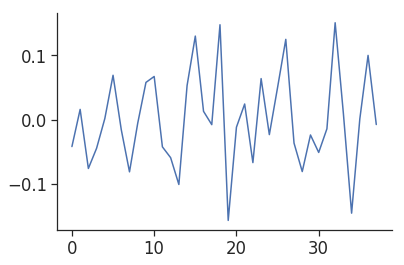

In [143]:
trace = sdf[sdf.cell_specimen_id==cell_specimen_id].trace.values[0]
plt.plot(trace)

In [144]:
experiments_table.iloc[]

8

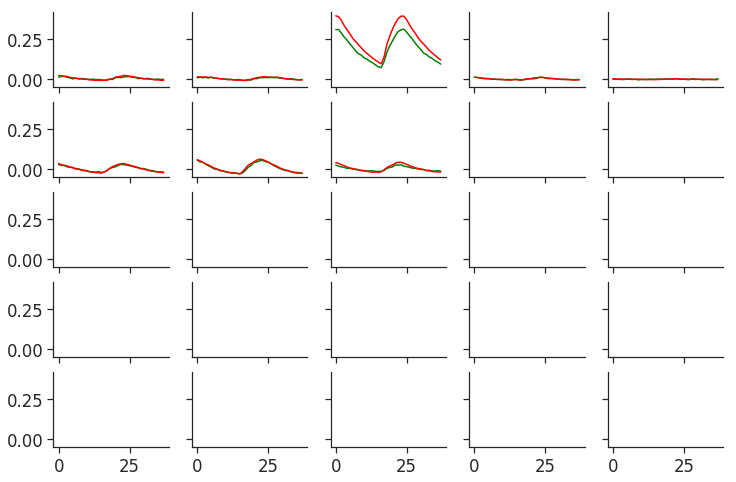

In [145]:
fig,axes = plt.subplots(5,5,figsize=(12,8),sharex=True,sharey=True)
for ii, cell_id in enumerate(sdfm.cell_specimen_id.unique()[:25]):
    ax = axes.flatten()[ii]
    ax.plot(
        sdfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').trace.mean(),
        color='green'
    )
    ax.plot(
        sdfm.query('cell_specimen_id == @cell_id and flash_metrics_labels != "low-lick,low-reward"').trace.mean(),
        color='red'
    )

In [ ]:
for 

In [146]:
flash_summary.query('behavior_session_id == @behavior_session_id')['flash_metrics_labels'].value_counts()

high-lick,low-reward     2313
high-lick,high-reward    1396
low-lick,low-reward      1098
Name: flash_metrics_labels, dtype: int64

### plot trial averaged trace for some image

Text(0.5, 0, '2P frames')

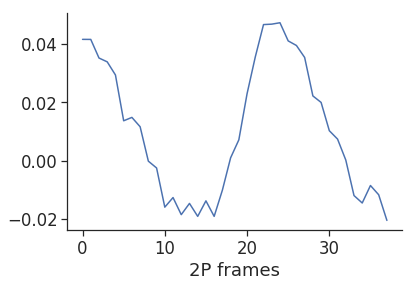

In [147]:
image_name = sdf.image_name.unique()[5]
trace = sdf[(sdf.cell_specimen_id==cell_specimen_id)&(sdf.image_name==image_name)].trace.mean()
plt.plot(trace)
plt.xlabel('dF/F')
plt.xlabel('2P frames')

Text(0.5, 0, '2P frames')

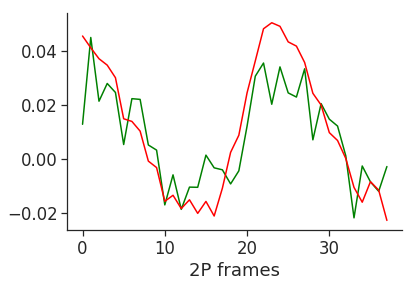

In [148]:
image_name = sdfm.image_name.unique()[5]
fig,ax=plt.subplots()
ax.plot(
    sdf[
        (sdfm.cell_specimen_id==cell_specimen_id)
        &(sdfm.image_name==image_name)
        &(sdfm['flash_metrics_labels'] == "low-lick,low-reward")
    ].trace.mean(),
    color='green'
)
ax.plot(
    sdf[
        (sdfm.cell_specimen_id==cell_specimen_id)
        &(sdfm.image_name==image_name)
        &(sdfm['flash_metrics_labels'] != "low-lick,low-reward")
    ].trace.mean(),
    color='red'
)
ax.set_xlabel('dF/F')
ax.set_xlabel('2P frames')

### set get_extended_stimulus_presentations to True to get stimulus_response_df with lots of extra columns

In [149]:
analysis.use_extended_stimulus_presentations = True # can also set this on creation of ResponseAnalysis object
sdf = analysis.get_response_df(df_name='stimulus_response_df')

loading stimulus_response_df


In [150]:
sdf.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_omission', 'p_value_stimulus', 'p_value_baseline', 'duration',
       'end_frame', 'image_index', 'image_name', 'image_set', 'index',
       'omitted', 'orientation', 'start_frame', 'start_time', 'stop_time',
       'prior_image_name', 'time_from_last_lick', 'time_from_last_reward',
       'time_from_last_change', 'change', 'block_index',
       'image_block_repetition', 'index_within_block', 'licks', 'rewards',
       'mean_running_speed', 'pre_flash_running_speed', 'flash_after_omitted',
       'flash_after_change', 'response_latency', 'response_binary',
       'early_lick', 'licked', 'lick_rate', 'rewarded', 'reward_rate',
       'running_rate'],
      dtype='object')

### Get change locked responses

In [151]:
analysis.experiment_id

995280513

In [152]:
behavior_session_id

995142529

In [153]:
db.lims_query("select * from behavior_sessions where id = '{}'".format(behavior_session_id))

,id,behavior_training_id,created_at,updated_at,storage_directory,temp_output_file_location,foraging_id,donor_id,ophys_session_id,equipment_id,user_id,ecephys_session_id
0,995142529,None,2019-12-18 21:26:00.938899,2019-12-19 11:21:00.235356,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,9d083baf-ec72-4f0f-8895-1e96b6a09350,910267431,995115654,523490076,724584497,None


In [154]:
tdf = analysis.get_response_df(df_name='trials_response_df')

loading trials_response_df


In [155]:
tdf.head()

,trials_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time,stop_time,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name
0,1,994309997,"[0.025887941299759062, 0.1306770357480309, 0.0...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.031615,0.007281,0.8416,0.9125,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061
1,1,994309982,"[0.06543640184301738, 0.07306711396508166, 0.0...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.008572,0.003144,0.5728,0.6337,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061
2,1,994310003,"[3.085973276372645, 2.772699842602638, 2.39899...","[-4.977173193920418, -4.944853887466389, -4.91...",0.215232,1.664732,0.1898,0.3023,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061
3,1,994309993,"[-0.036937575942905226, -0.03527529844201776, ...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.009645,0.000966,0.6628,0.7664,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061
4,1,994309948,"[-0.06567819915719134, 0.02343138156296748, -0...","[-4.977173193920418, -4.944853887466389, -4.91...",0.043563,-0.007705,0.0056,0.0160,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061


In [156]:
tdfm = tdf.merge(
    flash_summary_this_session,
    left_on = 'change_time',
    right_on = 'start_time',
    how = 'left'
)

In [157]:
tdfm.head(20)

,trials_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time_x,stop_time_x,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name,_id,flash_index,image_index,image_name,omitted,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_frame,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name,stimulus_presentations_id,start_time_y
0,1,994309997,"[0.025887941299759062, 0.1306770357480309, 0.0...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.031615,0.007281,0.8416,0.9125,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061,5e9508507d1eaf1fb67f3787,9,3,im061,0,1,1,0.186667,1,0.013333,0.433608,0.186667,1.0,0.071429,1.0,0.0,0.131313,0.868687,3.446553,0.603071,1,0,2,"high-lick,low-reward",0,-0.357416,0.774632,0.848973,3.717457,18392,307.040844,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,9.0,313.660553
1,1,994309982,"[0.06543640184301738, 0.07306711396508166, 0.0...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.008572,0.003144,0.5728,0.6337,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061,5e9508507d1eaf1fb67f3787,9,3,im061,0,1,1,0.186667,1,0.013333,0.433608,0.186667,1.0,0.071429,1.0,0.0,0.131313,0.868687,3.446553,0.603071,1,0,2,"high-lick,low-reward",0,-0.357416,0.774632,0.848973,3.717457,18392,307.040844,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,9.0,313.660553
2,1,994310003,"[3.085973276372645, 2.772699842602638, 2.39899...","[-4.977173193920418, -4.944853887466389, -4.91...",0.215232,1.664732,0.1898,0.3023,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061,5e9508507d1eaf1fb67f3787,9,3,im061,0,1,1,0.186667,1,0.013333,0.433608,0.186667,1.0,0.071429,1.0,0.0,0.131313,0.868687,3.446553,0.603071,1,0,2,"high-lick,low-reward",0,-0.357416,0.774632,0.848973,3.717457,18392,307.040844,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,9.0,313.660553
3,1,994309993,"[-0.036937575942905226, -0.03527529844201776, ...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.009645,0.000966,0.6628,0.7664,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061,5e9508507d1eaf1fb67f3787,9,3,im061,0,1,1,0.186667,1,0.013333,0.433608,0.186667,1.0,0.071429,1.0,0.0,0.131313,0.868687,3.446553,0.603071,1,0,2,"high-lick,low-reward",0,-0.357416,0.774632,0.848973,3.717457,18392,307.040844,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,9.0,313.660553
4,1,994309948,"[-0.06567819915719134, 0.02343138156296748, -0...","[-4.977173193920418, -4.944853887466389, -4.91...",0.043563,-0.007705,0.0056,0.0160,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061,5e9508507d1eaf1fb67f3787,9,3,im061,0,1,1,0.186667,1,0.013333,0.433608,0.186667,1.0,0.071429,1.0,0.0,0.131313,0.868687,3.446553,0.603071,1,0,2,"high-lick,low-reward",0,-0.357416,0.774632,0.848973,3.717457,18392,307.040844,0.0,995142529,-1.446

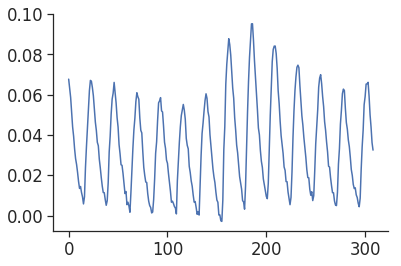

In [158]:
# popuation average response
plt.plot(tdf.trace.mean())

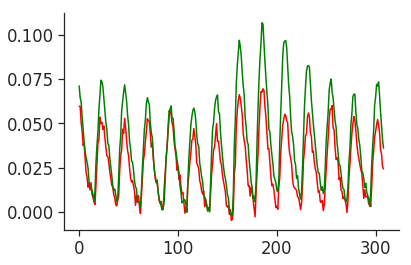

In [159]:
fig,ax=plt.subplots()
ax.plot(
    tdfm[(tdfm['flash_metrics_labels'] == "low-lick,low-reward")].trace.mean(),
    color='red'
)
ax.plot(
    tdfm[(tdfm['flash_metrics_labels'] != "low-lick,low-reward")].trace.mean(),
    color='green'
)

### Get omission triggered responses 

In [160]:
odf = analysis.get_response_df(df_name='omission_response_df')

loading omission_response_df


In [161]:
odf.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_omission', 'p_value_stimulus', 'duration', 'end_frame',
       'image_index', 'image_name', 'image_set', 'index', 'omitted',
       'orientation', 'start_frame', 'start_time', 'stop_time',
       'prior_image_name', 'time_from_last_lick', 'time_from_last_reward',
       'time_from_last_change', 'change', 'block_index',
       'image_block_repetition', 'index_within_block', 'licks', 'rewards',
       'mean_running_speed', 'pre_flash_running_speed', 'flash_after_omitted',
       'flash_after_change', 'response_latency', 'response_binary',
       'early_lick', 'licked', 'lick_rate', 'rewarded', 'reward_rate',
       'running_rate'],
      dtype='object')

In [162]:
odf.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,start_frame,start_time,stop_time,prior_image_name,time_from_last_lick,time_from_last_reward,time_from_last_change,change,block_index,image_block_repetition,index_within_block,licks,rewards,mean_running_speed,pre_flash_running_speed,flash_after_omitted,flash_after_change,response_latency,response_binary,early_lick,licked,lick_rate,rewarded,reward_rate,running_rate
0,40,994309997,"[0.014355391307789447, -0.024726593586387333, ...","[-4.977173193920418, -4.944853887466389, -4.91...",0.010193,0.003680,0.2016,0.3736,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774
1,40,994309982,"[-0.04902207454756787, 0.0809468992043299, 0.1...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.019345,0.008357,0.7368,0.9165,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774
2,40,994310003,"[0.18682567146423543, 0.2685072022436115, 0.29...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.071766,0.027353,0.7868,0.9755,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774
3,40,994309993,"[-0.01880032405208645, 0.035100963116947846, -...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.005346,-0.002953,0.5785,0.7746,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774
4,40,994309948,"[-0.033872905680151624, 0.047919716932400054, ...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.015732,0.005664,0.8888,0.9228,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774


In [163]:
odfm = odf.merge(
    flash_summary.query('behavior_session_id == @behavior_session_id'),
    left_on = 'stimulus_presentations_id',
    right_on = 'flash_index',
    how = 'left'
)
odfm.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,duration,end_frame,image_index_x,image_name_x,image_set,index,omitted_x,orientation,start_frame_x,start_time_x,stop_time_x,prior_image_name,time_from_last_lick,time_from_last_reward,time_from_last_change,change_x,block_index,image_block_repetition,index_within_block,licks,rewards,mean_running_speed,pre_flash_running_speed,flash_after_omitted,flash_after_change,response_latency,response_binary,early_lick,licked_x,lick_rate_x,rewarded_x,reward_rate_x,running_rate_x,_id,flash_index,image_index_y,image_name_y,omitted_y,change_y,licked_y,lick_rate_y,rewarded_y,reward_rate_y,running_rate_y,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_time_y,start_frame_y,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name
0,40,994309997,"[0.014355391307789447, -0.024726593586387333, ...","[-4.977173193920418, -4.944853887466389, -4.91...",0.010193,0.003680,0.2016,0.3736,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774,5e9508657d1eaf1fb67f37a6,40,8,omitted,1,0,1,0.467182,0,0.061868,0.148238,0.221297,0.0,0.27957,1.0,0.0,0.12539,0.87461,3.474805,0.588945,1,1,1,"high-lick,high-reward",1,-0.499853,0.774632,0.848968,3.72991,330.043521,19786,NaN,0.0,995142529,-1.446148,under_motivated,2.0,Run Away
1,40,994309982,"[-0.04902207454756787, 0.0809468992043299, 0.1...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.019345,0.008357,0.7368,0.9165,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774,5e9508657d1eaf1fb67f37a6,40,8,omitted,1,0,1,0.467182,0,0.061868,0.148238,0.221297,0.0,0.27957,1.0,0.0,0.12539,0.87461,3.474805,0.588945,1,1,1,"high-lick,high-reward",1,-0.499853,0.774632,0.848968,3.72991,330.043521,19786,NaN,0.0,995142529,-1.446148,under_motivated,2.0,Run Away
2,40,994310003,"[0.18682567146423543, 0.2685072022436115, 0.29...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.071766,0.027353,0.7868,0.9755,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774,5e9508657d1eaf1fb67f37a6,40,8,omitted,1,0,1,0.467182,0,0.061868,0.148238,0.221297,0.0,0.27957,1.0,0.0,0.12539,0.87461,3.474805,0.588945,1,1,1,"high-lick,high-reward",1,-0.499853,0.774632,0.848968,3.72991,330.043521,19786,NaN,0.0,995142529,-1.446148,under_motivated,2.0,Run Away
3,40,994309993,"[-0.01880032405208645, 0.035100963116947846, -...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.005346,-0.002953,0.5785,0.7746,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774,5e9508657d1eaf1fb67f37a6,40,8,omitted,1,0,1,0.467182,0,0.061868,0.148238,0.221297,0.0,0.27957,1.0,0.0,0.12539,0.87461,3.474805,0.588945,1,1,1,"high-lick,high-reward",1,-0.499853,0.774632,0.848968,3.72991,330.043521,19786,NaN,0.0,995142529,-1.446148,under_motivated,2.0,Run Away
4,40,994309948,"[-0.033872905680151624, 0.047919716932400054, ...","[-4.977173193920418, -4.944853887466389, -4.91...",-0.015732,0.005664,0.8888,0.9228,NaN,NaN,8,omitted,omitted,0,True,NaN,19786,336.912763,NaN,im077,0.021222,5.116269,5.2376,False,2,0,NaN,[337.142121082363],[],0.363286,0.360578,False,False,0.229358,True,False,1,0.467182,0,0.061868,0.276774,5e9508657d1eaf1fb67f37a6

In [164]:
len(odfm.cell_specimen_id.unique())

8

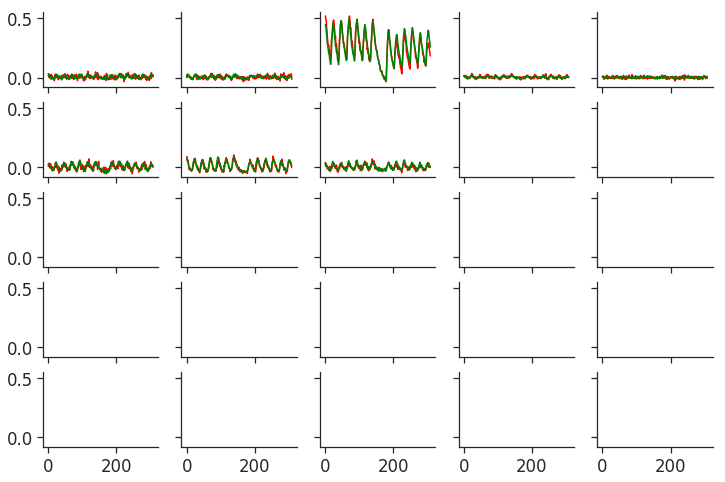

In [165]:
fig,axes = plt.subplots(5,5,figsize=(12,8),sharex=True,sharey=True)
for ii, cell_id in enumerate(odfm.cell_specimen_id.unique()[:25]):
    ax = axes.flatten()[ii]
    ax.plot(
        odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').trace.mean(),
        color='red'
    )
    ax.plot(
        odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels != "low-lick,low-reward"').trace.mean(),
        color='green'
    )

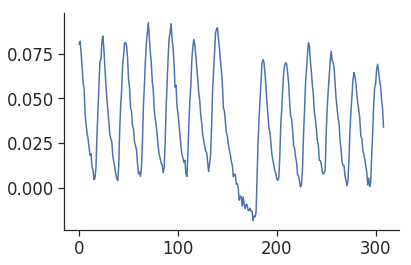

In [166]:
# popuation average response
plt.plot(odf.trace.mean())

### Get running behavior for omissions 

In [167]:
run_df = analysis.get_response_df(df_name='trials_run_speed_df')

loading trials_run_speed_df


In [168]:
run_df_merged = run_df.merge(
    flash_summary_this_session,
    left_on = 'change_time',
    right_on = 'start_time',
    how = 'left'
)

In [169]:
run_df_merged.head()

,index,trials_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time_x,stop_time_x,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name,_id,flash_index,image_index,image_name,omitted,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_frame,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name,stimulus_presentations_id,start_time_y
0,0,1,"[0.9561827808530181, 0.9523004259679152, 0.952...","[-4.987455426366339, -4.970774973435348, -4.95...",-0.560672,0.386613,0.8877,0.9091,"[313.8394156758723, 314.08962178047716, 314.25...",313.788399,0.005,False,False,False,True,False,False,False,True,False,309.878746,317.901904,8.023158,NaN,18391.0,313.660553,0.178863,im065,im061,5e9508507d1eaf1fb67f3787,9,3,im061,0,1,1,0.186667,1,0.013333,0.433608,0.186667,1.0,0.071429,1.0,0.0,0.131313,0.868687,3.446553,0.603071,1,0,2,"high-lick,low-reward",0,-0.357416,0.774632,0.848973,3.717457,18392,307.040844,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,9.0,313.660553
1,2,5,"[0.7685118753564424, 0.7854737958883193, 0.624...","[-4.987455426366339, -4.970774973435348, -4.95...",0.772120,0.187835,0.1595,0.1324,"[332.10430391319534, 332.3545024111609, 332.53...",331.796494,0.005,False,False,False,True,False,False,False,True,False,328.644084,335.899851,7.255768,NaN,19471.0,331.675163,0.429141,im061,im077,5e9508607d1eaf1fb67f379f,33,1,im077,0,1,1,0.442907,1,0.057670,0.132730,0.221453,1.0,0.260417,1.0,0.0,0.128391,0.871609,3.460380,0.596158,1,1,1,"high-lick,high-reward",0,-0.488938,0.774632,0.848970,3.730142,19472,325.055994,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,33.0,331.675163
2,4,11,"[0.345594995069874, 0.17264205750726727, 0.0, ...","[-4.987455426366339, -4.970774973435348, -4.95...",0.056300,-0.046767,0.4930,0.5220,"[351.5534940046369, 351.68691652745616, 351.82...",351.312406,0.005,False,False,False,True,False,False,False,True,False,347.409706,355.415744,8.006038,NaN,20641.0,351.191053,0.362441,im077,im062,5e9508727d1eaf1fb67f37b9,59,5,im062,0,1,1,0.498519,1,0.057407,0.156869,0.216296,1.0,0.265411,1.0,0.0,0.124528,0.875472,3.478992,0.586852,1,1,1,"high-lick,high-reward",0,-0.678880,0.774638,0.848961,3.732661,20642,344.572413,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,59.0,351.191053
3,6,13,"[-0.2696956294417909, -0.050014011636115976, 0...","[-4.987455426366339, -4.970774973435348, -4.95...",-0.184404,-0.276361,0.7040,0.7161,"[362.5291179642931, 362.7292703262787, 363.012...",362.571643,0.005,False,False,False,True,False,False,False,True,False,359.419148,366.674934,7.255786,NaN,21316.0,362.450233,0.078885,im062,im085,5e95087c7d1eaf1fb67f37c8,74,6,im085,0,1,1,0.501570,1,0.058311,0.121360,0.213333,1.0,0.273333,1.0,0.0,0.121584,0.878416,3.493453,0.579621,1,1,1,"high-lick,high-reward",0,-0.631911,0.774642,0.848952,3.714790,21317,355.831860,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,74.0,362.450233
4,8,16,"[0.09820990986755097, 0.09798489382797619, -0....","[-4.987455426366339, -4.970774973435348, -4.95...",-0.231195,0.138205,0.7503,0.7494,"[374.8224777108473, 375.0726694798622, 375.389...",374.581640,0.005,False,False,False,True,False,False,False,True,False,371.428920,378.684764,7.255844,NaN,22036.0,374.460043,0.362435,im085,im061,5e9508887d1eaf1fb67f37d8,90,3,im061,0,1,1,0.506058,1,0.060379,0.085036,0.212052,1.0,0.284738,1.0,0.0,0.119150,0.880850,3.505594,0.573551,1,1,1,"high-lick,high-reward",0,-0.627642,0.774643,0.848940,3.690200,22037,367.841976,0.0,995142529,-1.446148,under_motivated,2.0,Run Away,90.

Text(0.5, 0, 'stimulus frames')

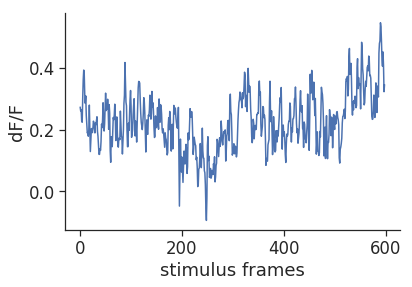

In [170]:
# running speed averaged across all trials
plt.plot(run_df.trace.mean())
plt.ylabel('dF/F')
plt.xlabel('stimulus frames')

Text(0.5, 0, 'stimulus frames')

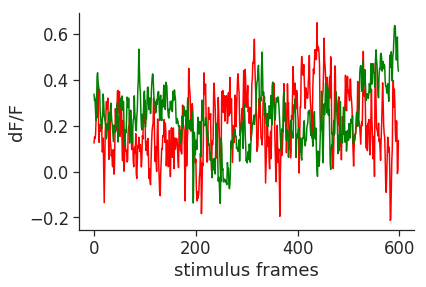

In [171]:
# running speed averaged across all trials
fig,ax=plt.subplots()
ax.plot(
    run_df_merged[(run_df_merged['flash_metrics_labels'] == "low-lick,low-reward")].trace.mean(),
    color='red'
)
ax.plot(
    run_df_merged[(run_df_merged['flash_metrics_labels'] != "low-lick,low-reward")].trace.mean(),
    color='green'
)
ax.set_ylabel('dF/F')
ax.set_xlabel('stimulus frames')

### get mean response dataframe for some set of conditions 

In [172]:
sdf = analysis.stimulus_response_df.copy() # can get this via lazy loading as well

loading stimulus_response_df


In [173]:
import visual_behavior.ophys.response_analysis.utilities as utilities

In [174]:
conditions = ['cell_specimen_id', 'image_name'] # conditions to groupby before averaging
mean_df = utilities.get_mean_df(sdf, cache_dir, conditions=conditions, flashes=True)

In [175]:
mean_df.head()

,cell_specimen_id,image_name,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,sem_baseline,pref_stim,fraction_significant_p_value_omission,fraction_significant_p_value_stimulus
0,994309940,im061,0.005232,0.001017,"[0.016707360147908325, 0.011574082283885628, 0...","[0.003240559675423646, 0.002902616693516783, 0...","[-0.034218056595288066, -0.009579504113731582,...",NaN,NaN,False,0.243464,0.003268
1,994309940,im062,0.000074,0.000810,"[0.0018577967004076298, 0.007613725813095485, ...","[0.0031042097541267187, 0.0029632545947478363,...","[-0.017948156991219294, 0.0005216300835160356,...",NaN,NaN,False,0.117647,0.000000
2,994309940,im063,0.021007,0.001976,"[0.0490009811170958, 0.035679718099484024, 0.0...","[0.004614219559406735, 0.00418830812531307, 0....","[0.019998394687520623, -0.014862262118871431, ...",NaN,NaN,False,0.393298,0.061728
3,994309940,im065,0.039779,0.003400,"[0.09510531079232236, 0.07625042106649588, 0.0...","[0.006790971484332922, 0.0062652129789418035, ...","[-0.02082139155017329, 0.025963386451524923, 0...",NaN,NaN,True,0.479720,0.132867
4,994309940,im066,0.003466,0.000905,"[0.00994469858366201, 0.005358829119805901, 0....","[0.003087835558540926, 0.0032002423210164103, ...","[-0.012621751020229662, 0.07284133210948693, -...",NaN,NaN,False,0.188785,0.000000


### plot mean trace for a cells preferred stimulus

In [176]:
# the get_mean_df function computes the preferred stimulus and adds it as a Boolean column

In [177]:
mean_trace = mean_df[(mean_df.cell_specimen_id==cell_specimen_id)&(mean_df.pref_stim==True)].mean_trace.values[0]

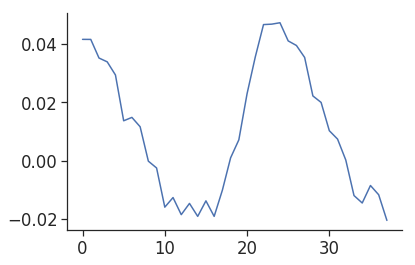

In [178]:
plt.plot(mean_trace)